# Car Sales Dataset

![CHD](car.jpg)

## Summary

This dataset contains the number of vehicle sales realized in a certain period. The number of sales was kept for every month.

The number of rows and columns in the dataset is (36, 2).

## Time Series Analysis 

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

## Models Used - Autoreggresive AR Model and ARIMA model

### Autoreggresive AR Model

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.It is a statistical model is autoregressive if it predicts future values based on past values. For example, an autoregressive model might seek to predict a stock's future prices based on its past performance.

### ARIMA model

`An autoregressive integrated moving average, or ARIMA`, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

In [1]:
import warnings
warnings.filterwarnings('ignore') #this was given to avoid warnings
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
## import the dataset into Pandas Dataframe. The head() function is used to get the first n rows.
df = pd.read_csv("sales-cars.csv")
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


 Month is not taken as month '2016-02' its in a quotation ...it is considered as a string. we need to take it as a date otherwise we cannot do timeseries analysis.So an other package is imported in the first cell from pandas import datetime

In [3]:
df.Month[1]

'2016-02'

In [4]:
## defining a parser to change string to date and time.
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

##### '%Y-%m' year and month
##### if we have mutiple columns with date we can give parse_dates=[0,2,6]"0,2,6" are the column numbers
##### index_col=0 date have to be an index so as to do my time series forecasting ,so i have given my 1st column as index

In [5]:
sales.head() #The head() function is used to get the first n rows.

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [6]:
df.shape

(36, 2)

<AxesSubplot:xlabel='Month'>

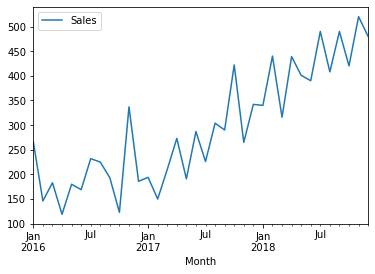

In [7]:
sales.plot() ## Plot it on a  pyplot from imported matplotlib.pyplot as plt in the first cell.
             ## Output : It is not a Stationary because there is a trend.

### Stationary means mean, variance and covariance is constant over periods.
#### we have to convert this series into stationary otherwise we cannot apply any of the timeseries analysis.

#### Converting Series in to Statinary we have to take the difference of the series

In [8]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [9]:
sales.diff(periods=1) ## Input: I have taken difference function of pandas and I have given diff as 1 
                      ## output: is the first number is Nan as the diff is sought in the next number. 146-266= -120, 183-146= 37, 119-183= -64

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


In [10]:
sales_diff= sales.diff(periods=1)

In [11]:
sales_diff = sales_diff[1:] ##I dont want that NAN to appear, so I am just displaying 1st value to the end.
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


when you try to find the correlation between two sales that is called as auto correlation. 
The dot with line plotted are lags and if we correlate sales with sales we get 1 correlation coefficient as shown in fig.
similarly 1 lag that is one time lag the correlation factor is 0.7 and 2 lags is 0.75 and it slowly decaying showing that the series is not stationary.
It should be ideally decayed immediately and the next correlation is either 0 or negative that shows the data is stationary. We need stationary data to do Time Series Forecasting.

### Stationary means the MEAN, VARIANCE & COVARIANCE is constant over different builds of time.

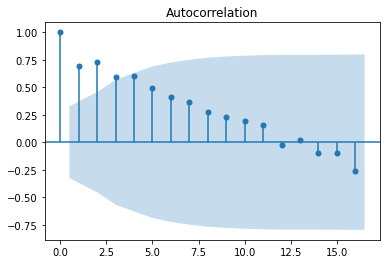

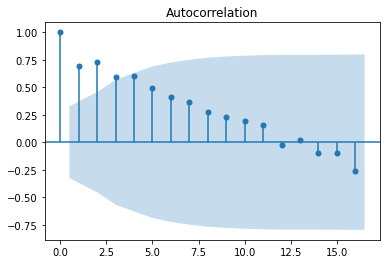

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [13]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


### Explanation of below cell.
#### It is also called as integrated of order 1(its 1 because we are taking 1 lag or 1 time period), 
#### denoted by d (for diff), one of the parameter of ARIMA model

In [14]:
sales_diff = sales.diff(periods=1)


In [15]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


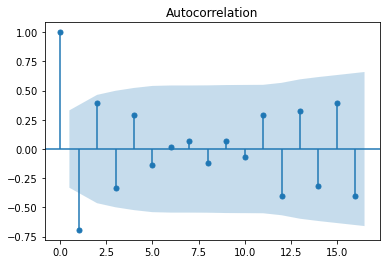

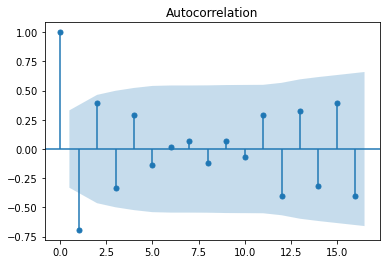

In [16]:
plot_acf(sales_diff) ## here it quickly decayed and went to negative so this is very good stationary

#### The mean at every point is same , the variance also the same and this data is good enough for moving forward for modelling.

<AxesSubplot:xlabel='Month'>

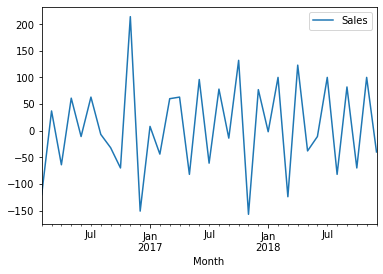

In [17]:
sales_diff.plot() 

## Done with:
The time column data have become Index and it is recognized as time

Then we looked at the plot where we found it is not stationary so we have taken a difference of it and then made it "Stationary".


In [18]:
X = sales.values
train = X[0:28] # 28 data as train data
test = X[28:]  # 10 data as test data
predictions = []

In [19]:
train.size

28

### Autoreggresive AR Model

In [20]:
import warnings
warnings.filterwarnings('ignore') #this was given to avoid warnings
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error #find the error square it add it and the find the avarage thats mean squared error.
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [21]:
X = sales.values ## its 3 years data so 3 * 12 months = 36 datas. I am taking 80 % of the data for training and 20 % for testing
X.size           ## 80 % of this data lets take 27

36

In [22]:
X = sales.values
train = X [0:26] # 26 datas as train data
test = X [26:] #10 datas as test data
prediction = [] # prediction is done using AR Model and then ARIMA Model

In [23]:
test.size

10

In [24]:
predictions = model_ar_fit.predict(start=26,end=36)  ## AR model we call it as predict and ARIMA model we call it as forecast

In [25]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

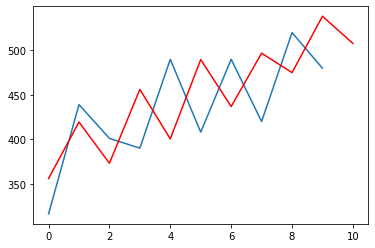

In [26]:
plt.plot(test)
plt.plot(predictions,color='red')

<AxesSubplot:xlabel='Month'>

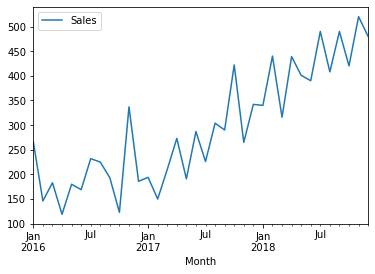

In [27]:
sales.plot() #this is our actual graph

### ARIMA model

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#### p,d & q  

p = periods taken for autoregressive model eg- If i want to predict sales in June , If I am taking May-June then the perids taken is 1,if am taking April may then I am taking 2 periods

d = Integrated order, difference

q = periods in moving average model

how to get the best fit is that, in ARIMA model we are combining 3 techniques, it is difficult to say which parameters of P D Q will actually works better.

There is the one method we use that is AIC method, we should go for the minimum value of AIC, its more like our mean squared error

In [29]:
import warnings
warnings.filterwarnings('ignore') #this was given to avoid warnings
model_arima = ARIMA(train,order=(9, 2, 0)) 
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) # i will print my AIC value and here i have got 312 as my aic value

312.79283456903505


In [30]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([353.11317587, 361.15643646, 387.13453517, 372.19108568,
       408.25636143, 375.05817465, 411.19357194, 303.28773258,
       397.80702606, 352.8316314 ])

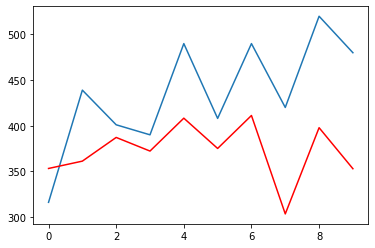

In [31]:
plt.plot(test)
plt.plot(predictions,color='red')

In [32]:
mean_squared_error(test,predictions)

6664.872637920866

`p=d=q` = range(0,5) # i have given all the values 0 to 5 values for PDQ as some of the combinations may not be correct and ARIMA might throw error and so we are trying to give a range of values to PDQ by using a simple tool called an iteration tool

`pdq` = list(itertools.product(p,d,q)) # in iteration tool i will convert it in to list, i have taken the product basically it combines all the combinations that is product that I will pass on PDQ

`pdq` # the output below prints out all the combinations like what we have given in model_arima = ARIMA(train,order=(9, 2, 0)) visually it looks perfect 9 is my time lag as when u look at the graph the pattern repeating in 9 or ten months ,0 is my moving average and 2 is differencing 2 times. I was just trying with the numbers to get the best fit.

In [33]:
import itertools 
p=d=q=range(0,5) 
pdq = list(itertools.product(p,d,q)) 
pdq 

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

for param in pdq: #here we call the above printed output as param
    
model_arima = ARIMA(train,order=param) # and then I'm simply call param instead of giving values like model_arima = ARIMA(train,order=(9, 2, 0))
        
print(param,model_arima_fit.aic) # I am checking which params gives me the minimum value

which combination gives me the minimum value?

(0, 2, 2) 278.04421109575054 i tried giving this but it is not satisfying as visually i doest looks so accurate but based on AIC its ok so i tried giving (9, 2, 0) my time lags was actually 9 and moving average 0 

In [34]:
import warnings
warnings.filterwarnings('ignore') #this was given to avoid warnings
for param in pdq: #here we call the above printed output as param 
    try:
        model_arima = ARIMA(train,order=param) # and then I'm simply call param instead of giving values like model_arima = ARIMA(train,order=(9, 2, 0))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic) # i have mentioned which params gives me the minimum value
    except:
        continue # try except continue was given to avoid throw back of error
                 # which combination gives me the minimum value?
           # (0, 2, 2) 278.04421109575054 i tried giving this but it is not satisfying as visually i doest looks so accurate but based on AIC its ok so i tried giving (9, 2, 0) my time lags was actually 9 and moving average 0 

(0, 0, 0) 308.0096539919454
(0, 0, 1) 307.97137973464396
(0, 0, 2) 304.7951964747078
(0, 0, 3) nan
(0, 0, 4) 300.1530963245398
(0, 1, 0) 298.93626636014545
(0, 1, 1) 285.7698381358301
(0, 1, 2) 285.9520236928796
(0, 1, 3) 287.874929126289
(0, 1, 4) 287.80406844940603
(0, 2, 0) 315.1545685734785
(0, 2, 1) 292.5343152759166
(0, 2, 2) 278.04421109575054
(0, 2, 3) 278.1718619010629
(1, 0, 0) 305.6355497247354
(1, 0, 1) 302.53147162149844
(1, 0, 2) 300.86767340437075
(1, 1, 0) 287.5890329814021
(1, 1, 1) 287.0668643941301
(1, 1, 2) 289.35957416365136
(1, 1, 4) 288.3614570715355
(1, 2, 0) 293.20019574876414
(1, 2, 1) 281.8781599936242
(1, 2, 2) 278.3430054932163
(2, 0, 0) 300.6312882418863
(2, 0, 1) 327.0422073555336
(2, 1, 0) 289.1907303163423
(2, 1, 1) 287.87364871384716
(2, 2, 0) 292.80701167344137
(2, 2, 1) 283.53489172234964
(3, 0, 0) 302.62359758142503
(3, 0, 4) 300.57837020255016
(3, 1, 0) 284.8544454751026
(3, 1, 1) 285.9356677925124
(3, 1, 2) 282.3460719631942
(3, 1, 3) 284.26020154